# Task2 Of Mini Project 1
## AmirHossein Hadinezhad, Andrei Serban, Gabriel Alejandro Martinica Ardon

In [254]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifierfrom sklearn.model_selection import GridSearchCVfrom sklearn.linear_model import Perceptronfrom sklearn.neural_network import MLPClassifier

### Loading the data (part2)

In [255]:
dataset = pd.read_csv("drug200.csv")
#debug lines
# print(np.count_nonzero(dataset==np.nan))
# print(dataset.head())


### Distribution Graph (Part3)

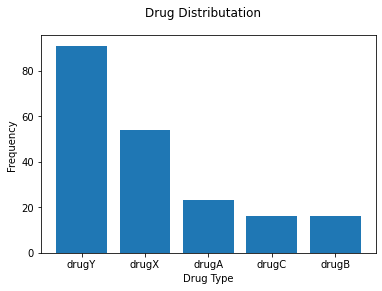

In [256]:

distributation = dataset.Drug.value_counts()

# dataset[-1].plot(kind='hist');
y = distributation.values
x = distributation.index
plt.plot()
plt.ylabel('Frequency')
plt.xlabel('Drug Type')
plt.bar(x, y)
plt.suptitle("Drug Distributation")
plt.savefig("Drug Distributation.pdf", format="pdf")
plt.show()

### Convering the data  (Part4)

In [260]:
dataset.BP = pd.Categorical(dataset.BP, ["LOW", "NORMAL", "HIGH"], ordered=True)

dataset.Cholesterol = pd.Categorical(dataset.Cholesterol, ["LOW", "NORMAL", "HIGH"], ordered=True)

dataset.BP = dataset.BP.cat.codes
dataset.Cholesterol = dataset.Cholesterol.cat.codes


features = dataset.iloc[:, :-1]
targets = dataset.iloc[:, -1]

features = pd.get_dummies(features, columns=['Sex'], prefix="Gender", prefix_sep=": ")
# targets = pd.get_dummies(targets, columns=['Drug'], prefix="Drug type", prefix_sep=": ")
# debug lines
# print(dataset.head())
# print(features)
# print(targets)

### Split dataset for training and test (part5)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(features.values, targets.values)

 ### Train using Gaussian Naive Bayes Classifie (part6a)

In [262]:
gaussian_naive_bayes_training = GaussianNB()
gaussian_naive_bayes_training.fit(X_train, y_train)

GaussianNB()

 ### Train using  Decision Tree (part6b)

In [263]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [ ]:
print("c)")
top_DT_parameters = {'criterion': ['entropy', 'gini'],
                     'max_depth': (2, 4), 
                     'min_samples_split': (2, 3, 7)}

clf_topdt = GridSearchCV(clf, top_DT_parameters)

clf_topdt.fit(X_train, y_train)

pred_result_gridsearch = clf_topdt.predict(X_test)

In [ ]:
print("d)")

clf_perceptron = Perceptron()
clf_perceptron.fit(X_train, y_train)
pred_result_perceptron = clf_perceptron.predict(X_test)

In [ ]:
print("e)")

clf_mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')
clf_mlp.fit(X_train, y_train)
pred_result_mlp = clf_mlp.predict(X_test)

In [ ]:
print("f)")

top_MLP_parameters = {'activation': ('logistic', 'tanh', 'relu', 'identity'),
                  'hidden_layer_sizes': ((30, 50), (10, 10, 10)),
                  'solver': ('adam', 'sgd')}

clf_top_mlp = GridSearchCV(clf_mlp, top_MLP_parameters)
clf_top_mlp.fit(X_train, y_train)
pred_result_top_mlp = clf_top_mlp.predict(X_test)